In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'


# importanto o numpy
import numpy as np

Essa notebook faz a solução da equação diferencial para um oscilador harmônico simples usando a rotina solve_ivp do scipy.integrate.

Equação diferencial para o oscilador

$$F_x = m \frac{d^2x}{dt^2} = -\omega_0^2 x$$


Queremos calcular $x(t)$ entre os instantes $t_0$ e $t_f$ para uma dada frequência de oscilação $\omega_0$.

In [2]:
# Definindo a frequência de oscilação em segundo^-1
omega_0 = 2.0 

2.0

Vimos que com o solve_ivp, estamos interessados em resolver

$$\frac{dy}{dt} = f(t,y)$$

onde $f(t,y)$ é uma função que dá a taxa de variação de y.

No nosso caso

$$v = \frac{dx}{dt}$$

e
$$f(t,x,v) = - \omega_0^2 x$$

Como escrevemos isso?


Matematicamente:

Eqs. diferenciais

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = - \omega_0^2 x $$


Numericamente:

Funções para $dv / dt$ e $d^2x / dt^2$

In [3]:
# definindo a funcao para a equacao diferencial da derivada de v(t)
def funcao_dvdt(t,x):
    '''
        Função para definir a equação para a taxa de variação de v(t) 
        que, por sua vez, é dada pela EDO de 2 ordem do Oscilador Harmônico
        
    Inputs:    
        t = variável do tempo
        x = coordenada espacial
    
    Outputs:
        função f(t,x) tal que
        dv/dt = f(t,x)
    '''
    return - omega_0**2 * x

# definindo a funcao para a equacao diferencial da derivada de x(t)
def funcao_d2xdt2(t, vx):
    '''
    Inputs:    
        t = variável de tempo
        vx = uma variável com duas entradas
        vx[0] = x(t)
        vx[1] = v(t)
   
   Outputs:
       Tupla (v(t), dv(t) / dt ) 
    '''
    return (vx[1], funcao_dvdt(t,vx[0]))

Para encontrar a função $x(t)$ entre os instantes $t = t_0$ e $t = t_f$ definimos o conjunto de $N$ pontos $$\{t_n = t_0, t_0+h,t_0 + 2h, t_0 + 3h, ..., t_0 + N h\}$$

Podemos escolher $h$ e determinar $N$ ou escolher $N$ e determinar $h$.

No primeiro caso, por exemplo:
$$t_0 = 0 \, s$$
$$t_f = 10 \,s $$
$$h = 0.01 \, s$$
Então, $$N = \frac{t_f-t_0}{h} + 1$$

In [4]:
t_0 = 0.0
t_f = 10.0
h = 0.1
N = int((t_f-t_0)/h)+1

101

No segundo caso, por exemplo:
$$t_0 = 0 \, s$$
$$t_f = 10 \,s $$
$$N = 1001$$
Então, $$h = \frac{t_f-t_0}{N-1}$$

In [5]:
t_0 = 0.0
t_f = 10.0
N = 101
h = (t_f-t_0) / (N-1)


0.1

Para definir os tempos, podíamos correr um loop e colocar numa lista. 
Exemplo:


In [6]:
ts = []
for n in range(N+1):
    t_n = t_0 + n * h
    ts.append(t_n)
    
print(ts)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000

Veja que, no total, temos $N+1$ pontos $t_n$ para incluirmos os extermos do intervalo!


O numpy tem uma rotina que permite calcular um conjunto de N pontos igualmente espaçados!
É o linspace!

A chamada seria:

In [7]:
ts = np.linspace(t_0, t_f, N, endpoint=True)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Com o conjunto de pontos, resta apenas brincar com as condições iniciais do problema para resolvê-lo.

Exemplo: oscilador parado que começa o movimento sendo puxado de $5 \, cm$ para a direita
    $$x(t = 0) = 0.05 \, m$$
    $$v(t=0) = 0\, m / s$$

In [8]:
x_0 = 0.05
v_0 = 0.0

0.0

Finalmente, vamos usar o solve_ivp para determinar $x(t)$ e $v(t)$!

Veja os argumentos da função que são do nosso interesse:

Inputs:

   fun: função que dá $\frac{dy}{dt}$

   t_span: tupla (t_f, t_0)

   y0: condição inicial para $y(t)$, i.e., $y(t=0) = y_0$

   method: método de integração. Aqui, está usando o Runge Kutta de 4 ordem

   t_eval: os instantes de tempo para cálculo (o mesmo da variável ts acima)


Outputs:
    
   results.t: variável com conjunto de ts (ts se não for passado t_eval)
    
   results.y: variável com o conjunto de y(t) para todo $t \in \{t_n\}$
   
   
   
   
No nosso caso, queremos ter acesso a $v(t)$ e $x(t)$, por isso:


In [9]:
from scipy.integrate import solve_ivp
vxt = solve_ivp(funcao_d2xdt2, [t_0, t_f], (x_0, v_0), t_eval=ts) 
xs = vxt.y[0]
vs = vxt.y[1]

array([ 0.        , -0.01986818, -0.03894555, -0.05646601, -0.07173715,
       -0.08416721, -0.09323521, -0.09856575, -0.09995708, -0.09737991,
       -0.09094026, -0.08086575, -0.06753992, -0.05150424, -0.03343909,
       -0.01404641,  0.00590169,  0.02562193,  0.04433066,  0.06126593,
        0.07577102,  0.08723889,  0.0952096 ,  0.09938071,  0.09960916,
        0.09588458,  0.08832215,  0.07720812,  0.06300197,  0.04631193,
        0.02778301,  0.0081476 , -0.01182587, -0.03133935, -0.0495926 ,
       -0.0658792 , -0.07952333, -0.08998083, -0.09684885, -0.09987162,
       -0.09893192, -0.09403231, -0.08535326, -0.07325706, -0.05826808,
       -0.04096634, -0.02203045, -0.00219974,  0.017732  ,  0.03694252,
        0.05468866,  0.07024013,  0.08297839,  0.09240811,  0.09816577,
        0.10002957,  0.09788943,  0.09181637,  0.08206853,  0.06907586,
        0.05334234,  0.03547938,  0.0161824 , -0.00377485, -0.02356433,
       -0.04242034, -0.05957251, -0.0743403 , -0.08614595, -0.09

Observando os resultados: matplotlib

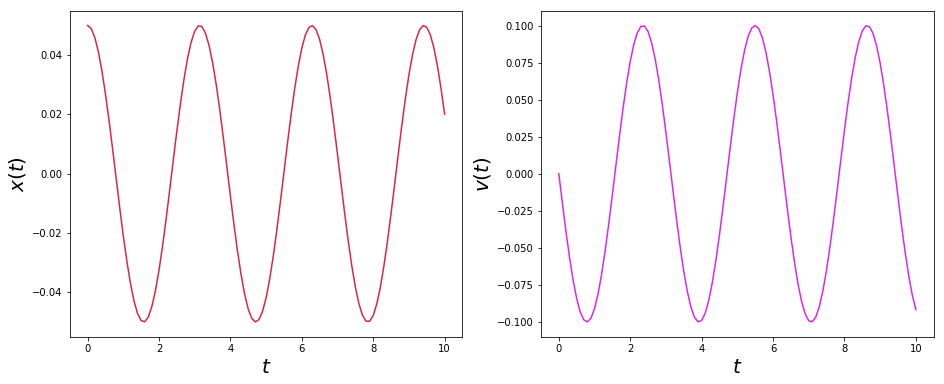

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.plot(ts, xs, color='#de2440')


ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"$x(t)$", fontsize=20)

av = fig.add_subplot(122)
av.plot(ts, vs, color='#de24F0')


av.set_xlabel(r"$t$", fontsize=20)
av.set_ylabel(r"$v(t)$", fontsize=20)

fig.subplots_adjust(left=0., right=1.0,hspace=2.5)

Animação

In [25]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np


fig_ani, ax_ani = plt.subplots()
ax_ani.set_xlabel(r"$t$", fontsize=20)
ax_ani.set_ylabel(r"$x(t), v(t)$", fontsize=20)

h = ax_ani.axis([t_0, t_f,-0.1,0.1])
l, = ax_ani.plot([],[], color='#de24F0', label=r"$x(t)$")
l2, = ax_ani.plot([],[], color='#0e24F0', label=r"$v(t)$")

def animate(i):
    l.set_data(ts[:i], xs[:i])
    l2.set_data(ts[:i], vs[:i])
    
fig_ani.subplots_adjust(left=0.15)
leg = ax_ani.legend(ncol=2, loc='center', bbox_to_anchor=(0.5,1.1))

ani = matplotlib.animation.FuncAnimation(fig_ani, animate, frames=N+1)

In [26]:
ani